In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import load_model
model = load_model('/content/drive/My Drive/Data_set/model.h5')

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

<IPython.core.display.Javascript object>

1/1 [==============================] - 0s 173ms/step


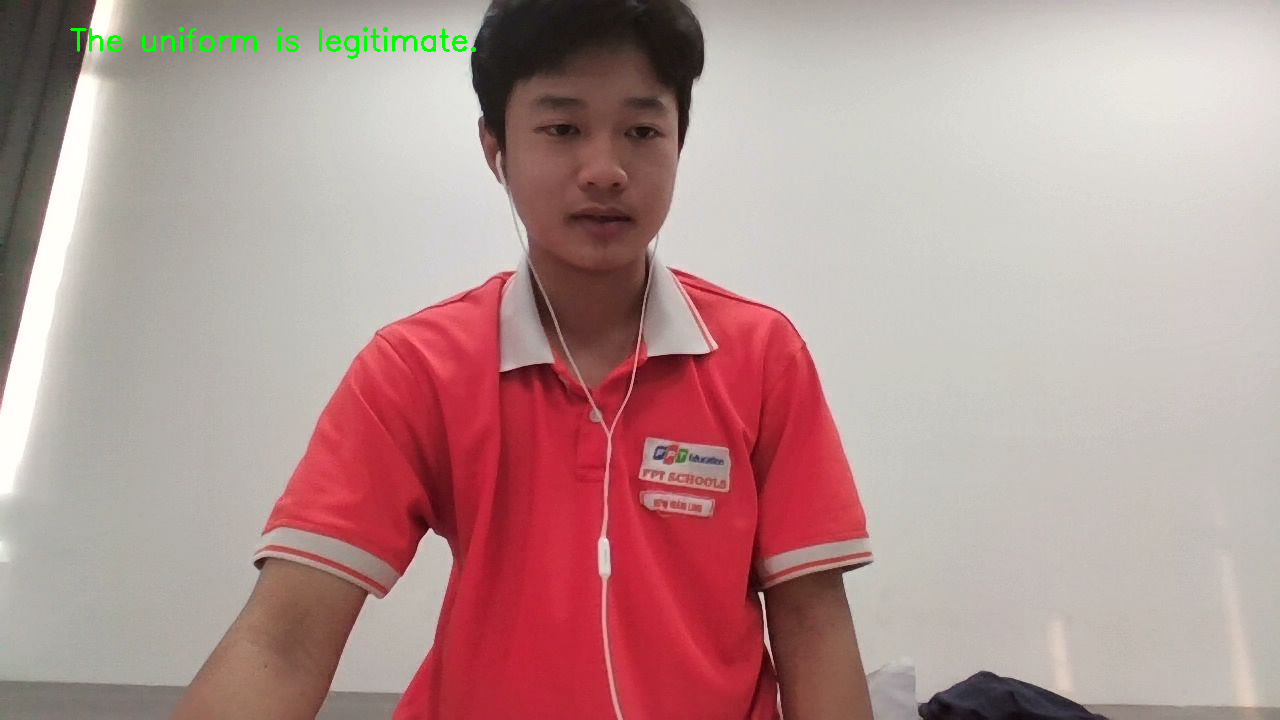

In [ ]:
import cv2
from PIL import Image
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from IPython.display import Image
import numpy as np

frame = take_photo()

test_image = image.load_img('photo.jpg', target_size=(150, 150))
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.
prediction = model.predict(test_image)
if prediction > 0.8 and prediction < 1:
    text = "The uniform is legitimate."
else:
    text = "The uniform is not legitimate."

# Show the image which was just taken.

# Load the image
img = cv2.imread('photo.jpg')

# Add text to the image
font = cv2.FONT_HERSHEY_SIMPLEX
text_color = (0, 255, 0)
text_position = (70, 50)
cv2.putText(img, text, text_position, font, 1, text_color, 2)

# Display the image with text
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()